### ETL con una porción de los datos, para iniciar borrador de Power Bi

_En esta porción de código, se trabajará con una pequeña porción de los datos de Google Maps con el objetivo de identificar los principales datos necesarios para asi obtener una interfaz gráfica en power bi que brinde información relevante en función de los KPI seleccionados_.

In [1]:
import pandas as pd
df= pd.read_csv('./Prueba_PowerBI/GoogleMapsDF (1).csv')

In [2]:
# Se analiza los datos básicos que contiene el dataframe GoogleMapsDF

df.head(3)

,name_x,gmap_id,address,avg_rating,user_id,name_y,time,rating,text,pics,resp
0,Subway,0x80c364f7c3f4593d:0x48478cfad03fdbcb,"Subway, 16251 N D St, Victorville, CA 92394",4.2,102713779159148672215,william mj cummins,1624067249657,1,I went to this subway today they only had whea...,NaN,NaN
1,Subway,0x80c364f7c3f4593d:0x48478cfad03fdbcb,"Subway, 16251 N D St, Victorville, CA 92394",4.2,109191138258127680300,Tracy Wisneski,1533858489447,1,I just went here today and i have no idea what...,[{'url': ['https://lh5.googleusercontent.com/p...,NaN
2,Subway,0x80c364f7c3f4593d:0x48478cfad03fdbcb,"Subway, 16251 N D St, Victorville, CA 92394",4.2,102235696076480343497,Emilee Clarke,1574113648966,4,I specifically liked the veggies sub that was ...,NaN,NaN


In [4]:
df.describe()

,avg_rating,time,rating
count,1584.000000,1.584000e+03,1584.000000
mean,3.490593,1.551077e+12,3.731061
std,0.512934,5.277344e+10,1.443707
min,1.300000,1.302213e+12,1.000000
25%,3.100000,1.524888e+12,3.000000
50%,3.700000,1.557177e+12,4.000000
75%,3.800000,1.589792e+12,5.000000
max,4.500000,1.630000e+12,5.000000


In [5]:
# Identificamos la cantidad de datos nulos en el dataframe. Teniendo en cuenta que las columnas pic
# y resp contienen más del 80% de datos nulos procedemos a eliminarlos ya que no brinda información
#relevante para el análisis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name_x      1584 non-null   object 
 1   gmap_id     1584 non-null   object 
 2   address     1584 non-null   object 
 3   avg_rating  1584 non-null   float64
 4   user_id     1584 non-null   object 
 5   name_y      1584 non-null   object 
 6   time        1584 non-null   int64  
 7   rating      1584 non-null   int64  
 8   text        846 non-null    object 
 9   pics        26 non-null     object 
 10  resp        13 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 136.2+ KB


In [6]:
# Se eliminan las columnas pics y resp

#df = df.drop(columns=['pics', 'resp'])
#Revisamos como quedan el nuevo dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name_x      1584 non-null   object 
 1   gmap_id     1584 non-null   object 
 2   address     1584 non-null   object 
 3   avg_rating  1584 non-null   float64
 4   user_id     1584 non-null   object 
 5   name_y      1584 non-null   object 
 6   time        1584 non-null   int64  
 7   rating      1584 non-null   int64  
 8   text        846 non-null    object 
 9   pics        26 non-null     object 
 10  resp        13 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 136.2+ KB


#### Análisis de sentimientos

Con la columna Text que es en donde se encuentran las reseñas realizadas por los usuarios realizamos un análisis de sentimientos indenficando si es una reseña positiva o negativa.

In [7]:
from textblob import TextBlob

# Convierte los valores en la columna 'text' a cadenas de texto
df['text'] = df['text'].astype(str)

# Aplica el análisis de sentimientos, mostrando el resultado en la columna sentiment
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

df['sentiment']
# Se muestran los sentimientos en una escala de -0 a 0.


0      -0.130769
1       0.238095
2       0.468750
3       0.242208
4       0.023485
          ...   
1579    0.000000
1580    0.000000
1581    0.000000
1582    0.000000
1583    0.000000
Name: sentiment, Length: 1584, dtype: float64

In [8]:

# Aplicamos una función para etiquetar los valores de polaridad como "positivo" o "negativo"
def label_sentiment(polarity):
    if polarity > 0:
        return "positivo"
    else:
        return "negativo"

# Aplicar la función de etiquetado a la columna 'sentiment' y crear una nueva columna 'sentiment_label'
df['sentiment_label'] = df['sentiment'].apply(label_sentiment)
df['sentiment_label']

0       negativo
1       positivo
2       positivo
3       positivo
4       positivo
          ...   
1579    negativo
1580    negativo
1581    negativo
1582    negativo
1583    negativo
Name: sentiment_label, Length: 1584, dtype: object

### Búsqueda de palabras específcas
Dentro de la columna 'text' que contiene las reseñas, buscamos la presencia de las palabras específicas (clean, food, Time) para así identificar su relevancia para el análisis. 

In [11]:
import pandas as pd



# Definir las palabras clave
keywords = ['clean', 'food', 'time']

# Contar la presencia de las palabras clave en cada reseña
for keyword in keywords:
    df[keyword] = df['text'].str.lower().str.contains(keyword).astype(int)


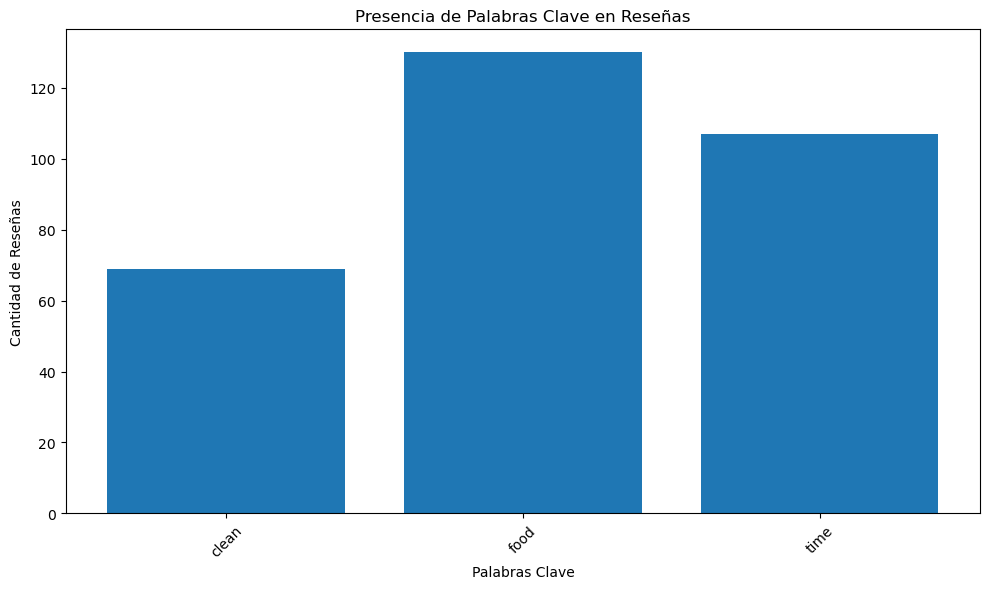

In [12]:
import matplotlib.pyplot as plt

# Contar la cantidad de reseñas que mencionan cada palabra clave
keyword_counts = df[keywords].sum()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(keyword_counts.index, keyword_counts.values)
plt.xlabel('Palabras Clave')
plt.ylabel('Cantidad de Reseñas')
plt.title('Presencia de Palabras Clave en Reseñas')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Dentro de la columna text se identifica que la palabras que más se repiten del conjunto de palabras escogidas, son time y food lo cual quiere decir que ambas son relavantes para el análisis

### Análisis Geográfico

A continuación pasamos a extraer los datos que contiene la columna "address" para que así en el powerbi podamos realizar una selección por los cada uno de los datos que contiene el dataframe.

In [ ]:
df['address']

0       Subway, 16251 N D St, Victorville, CA 92394
1       Subway, 16251 N D St, Victorville, CA 92394
2       Subway, 16251 N D St, Victorville, CA 92394
3       Subway, 16251 N D St, Victorville, CA 92394
4       Subway, 16251 N D St, Victorville, CA 92394
                           ...                     
1579     Subway, 210 E Central Ave, Nixon, TX 78140
1580     Subway, 210 E Central Ave, Nixon, TX 78140
1581     Subway, 210 E Central Ave, Nixon, TX 78140
1582     Subway, 210 E Central Ave, Nixon, TX 78140
1583     Subway, 210 E Central Ave, Nixon, TX 78140
Name: address, Length: 1584, dtype: object

In [ ]:
# Divide la columna 'address' en dos partes usando rsplit y obtiene la última parte
df['zipcode'] = df['address'].str.rsplit(',', 1).str[-1].str.strip()
df['zipcode']

0       CA 92394
1       CA 92394
2       CA 92394
3       CA 92394
4       CA 92394
          ...   
1579    TX 78140
1580    TX 78140
1581    TX 78140
1582    TX 78140
1583    TX 78140
Name: zipcode, Length: 1584, dtype: object

In [ ]:
# Utiliza str.split() para dividir la columna 'address' en partes utilizando la coma como separador
df['address_parts'] = df['address'].str.split(',')

# Extrae el último elemento de cada lista y aplica str.strip() para eliminar espacios en blanco adicionales
df['state'] = df['address_parts'].apply(lambda x: x[-1].strip())
df['state']

0       CA 92394
1       CA 92394
2       CA 92394
3       CA 92394
4       CA 92394
          ...   
1579    TX 78140
1580    TX 78140
1581    TX 78140
1582    TX 78140
1583    TX 78140
Name: state, Length: 1584, dtype: object

In [ ]:
# Utiliza str.extract() con una expresión regular para capturar el código de estado (por ejemplo, "CA")
df['state_code'] = df['state'].str.extract(r'([A-Z]{2})')
df['state_code']

0       CA
1       CA
2       CA
3       CA
4       CA
        ..
1579    TX
1580    TX
1581    TX
1582    TX
1583    TX
Name: state_code, Length: 1584, dtype: object

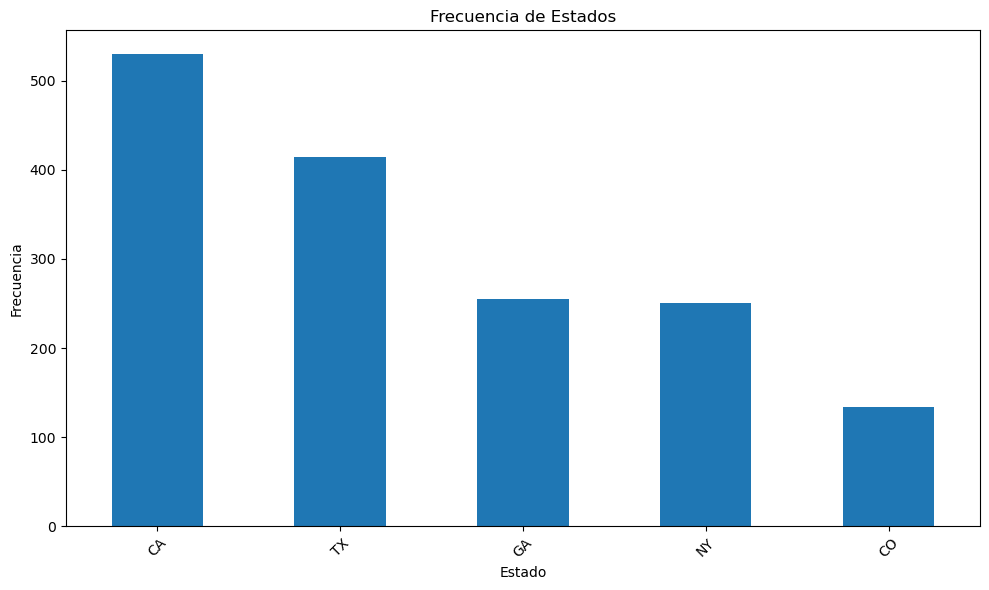

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calcular la frecuencia de cada estado
state_counts = df['state_code'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar')
plt.xlabel('Estado')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Estados')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
#El nuevo dataframe lo pasamos a archivo .csv para 
#luego realizar el análisis de sus datos en Powerbi
nombre_archivo= 'PowerBi_1.csv'
df.to_csv(nombre_archivo, index= False)